image preprocessing:

1.Reading an image file and converting it to a numpy array
2.  Resizing an image
3.RGB to Grayscale conversion









In [ ]:
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Print shape of the training images
print("Shape of training images:", train_images.shape)

# Print number of training samples
num_samples = train_images.shape[0]
print("Number of training samples:", num_samples)


Shape of training images: (50000, 32, 32, 3)
Number of training samples: 50000


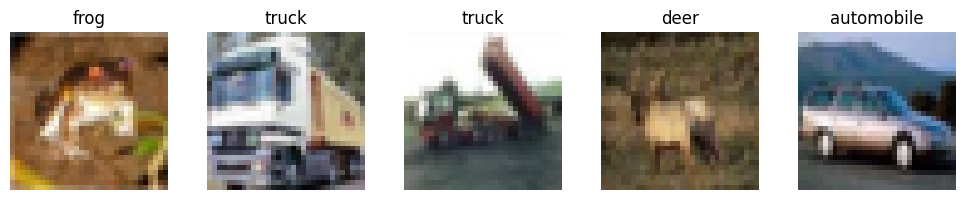

In [ ]:
# Define class names for CIFAR-10
import matplotlib.pyplot as plt
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Display some training images
num_images_to_display = 5

plt.figure(figsize=(10, 2))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
train_images = np.array(train_images)
test_images = np.array(test_images)
# Print shape of the converted NumPy array
print("Shape of training images as NumPy array:", train_images.shape)

Shape of training images as NumPy array: (50000, 32, 32, 3)


In [ ]:
# Perform encoding on train_labels
encoded_train_labels = train_labels.flatten()

# Perform encoding on test_labels
encoded_test_labels = test_labels.flatten()

# Print encoded labels
print(encoded_train_labels[0:5])

[6 9 9 4 1]


here resizing of image is not required since they are of equal(32x32)

In [ ]:

# convert image list and label list to numpy arrays

import numpy as np
# Convert image list to NumPy array
image_array = np.array(train_images)

# Convert label list to NumPy array
label_array = np.array(train_labels)

# Print shapes of the converted NumPy arrays
print("Shape of image array:", image_array.shape)
print("Shape of label array:", label_array.shape)


Shape of image array: (50000, 32, 32, 3)
Shape of label array: (50000, 1)


In [ ]:
print( train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
print(test_images.shape, test_labels.shape)

(10000, 32, 32, 3) (10000, 1)


In [ ]:
# scaling the data

x_train_scaled = train_images/255

x_test_scaled = test_images/255


Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation='relu'), #hidden layer
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax') #output layer

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 206,282
Trainable params: 206,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
# training the neural network
model.fit(x_train_scaled, train_labels, validation_split=0.1, epochs=15)

Epoch 1/15
1407/1407 [==============================] - 11s 4ms/step - loss: 1.8811 - acc: 0.3147 - val_loss: 1.8232 - val_acc: 0.3404
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7531 - acc: 0.3678 - val_loss: 1.7051 - val_acc: 0.3882
Epoch 3/15
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6976 - acc: 0.3879 - val_loss: 1.7130 - val_acc: 0.3822
Epoch 4/15
1407/1407 [==============================] - 7s 5ms/step - loss: 1.6633 - acc: 0.4014 - val_loss: 1.6426 - val_acc: 0.4148
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6394 - acc: 0.4074 - val_loss: 1.6535 - val_acc: 0.4148
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6203 - acc: 0.4162 - val_loss: 1.6907 - val_acc: 0.3874
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6123 - acc: 0.4205 - val_loss: 1.6337 - val_acc: 0.4138
Epoch 8/15
1407/1407 [==============================] - 8s 5m

ResNet50

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))  #resnet takes images of 256X256 but ours is 32x32 so we need to resize
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
num_of_classes = 10

model = models.Sequential()
#to convert images to 256x256 we add 3 upsampling
model.add(layers.UpSampling2D((2,2)))   #32x2 =64x64
model.add(layers.UpSampling2D((2,2))) # 128x128
model.add(layers.UpSampling2D((2,2))) #256x256

model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization()) #do BatchNormalization after every layer

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
history = model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, test_labels)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 43s 114ms/step - loss: 2.4044 - acc: 0.1009
Test Accuracy = 0.10090000182390213


using VGG-16